# Esercitazione 10
**7  Maggio 2024**

In [1]:
import numpy as np
import scipy.linalg as spi
import SolveTriangular
import matplotlib.pyplot as plt
import math

### Codice EquazioniNormali
Implementare la function  **eqnorm(A,b)** che implementa il metodo delle equazioni normali per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare 

In [26]:
def eqnorm(A,b):
    G = A.T@A
    f = A.T@b
    
    
    # uso Cholesky
    L = spi.cholesky(G, lower=True)
    Lt = L.T # sarebbe una matrice triangolare superiore
    
    y, flag = SolveTriangular.Lsolve(L,f)
    if (flag == 0):
        x, flag = SolveTriangular.Usolve(Lt, y)
    else:
        x = y
    
    return x

### Codice QRLS
Implementare la function  **qrLS(A,b)** che utilizza il metodo QR per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [4]:
def qrLS(A,b):
    # fattorizzo usando QR
    n = A.shape[1]
    Q, R = spi.qr(A)
    # viene ridotta a quadrata se no si spacca Usolve
    R = R[:n,:]
    h = Q.T@b
    x, flag = SolveTriangular.Usolve(R, h[:n])
    residuo=np.linalg.norm(h[n:])**2
    return x, residuo
    

### Codice SVDLS
Implementare la function  **svdLS(A,b)** che utilizza  il metodo SVD per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [13]:
def svdLS(A, b):
    m,n = A.shape # m righe n colonne
    U,s,VT=spi.svd(A) # U vettori singolari sinitri, VT vettori singolari destri, s vettore con valori diag della matrice
    V = VT.T
    thresh=np.spacing(1)*m*s[0] ##Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
    k=np.count_nonzero(s>thresh)
    
    d=U.T@b
    d1 = d[:k].reshape(k,1)
    s1 = s[:k].reshape(k,1)
    d2 = d[k:]
    c = d1 / s1
    x=V[:,:k]@c 
    residuo=np.linalg.norm(d[k:])**2
    
    return x, residuo

## Esercizio 1
- Si utilizzino i tre metodi implementati  per l'approssimazione ai minimi quadrati delle seguenti configurazioni di dati:

$$
\begin{array}{l}
x_1 = [-3.5, \, -3, \, -2, \, -1.5, \, -0.5, \, 0.5, \, 1.7, \, 2.5, \, 3] ;\\
y_1 = [-3.9, \, -4.8, \, -3.3, \, -2.5, \, 0.3, \, 1.8, \, 4, \, 6.9, \, 7.1] ;\\
x_2 = [-3.14, \, -2.4, \, -1.57, \, -0.7, \, -0.3, \, 0, \, 0.4, \, 0.7, \, 1.57] ;\\
y_2 = [0.02, \, -1, \, -0.9, \, -0.72, \, -0.2, \, -0.04, \, 0.65, \, 0.67, \, 1.1] ;\\
x_3 = [[1.001,\, 1.004,\, 1.005,\,1.0012, \,1.0013,  \, 1.0014,  \, 1.0015, \, 1.0016] ;\\
y_3 = [-1.2, \, -0.95, \, -0.9, \, -1.15, \, -1.1, \, -1] ;\\
\end{array}
$$

al variare del grado $n$ tra 1 e 4.



In [22]:
x=np.array([-3.5,-3, -2, -1.5, -0.5, 0.5, 1.7, 2.5, 3]) 
y=np.array([-3.9,-4.8,-3.3,-2.5, 0.3,1.8,4,6.9,7.1]) # sarà il nostro termine noto
#x=np.array( [-3.14,  -2.4,  -1.57,  -0.7,  -0.3,  0,  0.4,  0.7,  1.57]  )
#y=np.array(  [0.02,  -1, -0.9,   -0.72,   -0.2,   -0.04,  0.65,   0.67,   1.1] )
#x  = np.array([1.001, 1.004, 1.005,1.0012, 1.0013,   1.0014,   1.0015,  1.0016])
#y  = np.array([-1.2,-1.0, -0.98,-0.95,-0.9, -1.15, -1.1, -1])

# Per capire perchè viene usato vander vai nel Pdf sui sistemi sovradeterminati PAG.13
m=x.shape[0]
n=1  #grado del polinomio di regressione
n1=n+1  # gradi di libertà
A=np.vander(x,increasing=True)[:,:n1]
print(eqnorm(A,y))
res_eqnorm = np.linalg.norm(A@eqnorm(A,y)-y.reshape(A.shape[0],1), 2)**2
print("Residuo equazioni normali", res_eqnorm)
print(qrLS(A,y))
print(svdLS(A, y))

[[1.21492318]
 [1.90511021]]
Residuo equazioni normali 4.954617839084975
(array([[1.21492318],
       [1.90511021]]), 4.954617839084979)
(array([[1.21492318],
       [1.90511021]]), 4.954617839084979)


## Esercizio 2: 
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
\begin{array}{l}
x = [0.0004, \, 0.2507, \, 0.5008, \, 2.0007, \, 8.0013]  ;\\
y = [0.0007, \, 0.0162, \, 0.0288, \, 0.0309, \, 0.0310] ;
\end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).



Residuo: 0.0004848327762313227


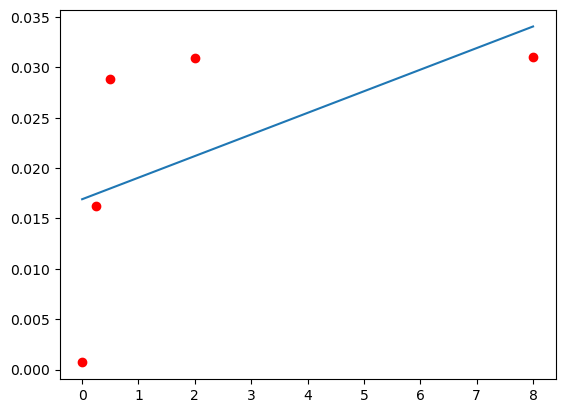

Residuo QR: 0.00023646355940249808


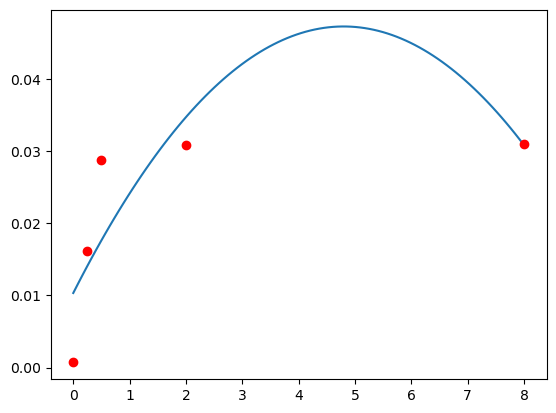

In [54]:
x=np.array([0.0004,0.2507,0.5008,2.0007,8.0013])
y=np.array([0.0007,0.0162,0.0288,0.0309,0.0310])
n=1  #grado del polinomio di regressione
n1=n+1  # gradi di libertà
A = np.vander(x, increasing=True)[:,:n1]
alpha = eqnorm(A,y)

# calcolo del residuo
res = np.linalg.norm(A@alpha-y.reshape(A.shape[0],1), 2)**2
print("Residuo:", res)

# crea il polinomio con i risultati di alpha
p = lambda x : alpha[0] + alpha[1]*x
pt_range = np.linspace(np.min(x),np.max(x),100)
plt.plot(pt_range,p(pt_range))
plt.plot(x,y,'ro')
plt.show()

n=2  #grado del polinomio di regressione
n1=n+1  # gradi di libertà
B = np.vander(x, increasing=True)[:,:n1]
alpha ,residuo_QR=qrLS(B,y)

res = np.linalg.norm(B@alpha-y.reshape(B.shape[0],1), 2)**2
print("Residuo QR:", residuo_QR)

p = lambda x : alpha[0] + alpha[1]*x + alpha[2]*x**2
plt.plot(pt_range,p(pt_range))
plt.plot(x,y,'ro')
plt.show()


## Esercizio 3:
Scrivere uno script Python per approssimare la seguente configurazione di punti

$$
\begin{array}{l}
x = [10 \, : \, 0.5/5 \, : \, 10.5] ;\\
y = [11.0320, \, 11.1263, \, 11.1339, \, 11.1339, \, 11.1993, \, 11.1844] ;
\end{array}
$$

mediante un polinomio ai minimi quadrati di grado 4 costruito  con il metodo
delle equazioni normali, con il metodo QRLS e con il metodo SVDLS.
Perturbare poi il secondo punto nel seguente modo
$$x(1) = x(1) + 0.013; \quad y(1) = y(1) - 0.001;$$
e calcolare i polinomi ai minimi quadrati relativi alla
configurazione perturbata. Commentare e motivare i risultati ottenuti.



### Codici per l'interpolazione polinomiale nella forma di Lagrange 

Scrivere la function **interpL** che calcoli
il polinomio interpolante in forma di Lagrange  
Tale function deve assumere come dati in input:
 
 - x vettore dei nodi di interpolazione,
- y vettore dei valori della funzione nei nodi di interpolazione,
- xx vettore dei punti in cui si vuole valutare il polinomio interpolante.
 
In output deve essere restituito yy vettore contenente i valori assunti dal polinomio interpolante.

 
Funzioni Python  utili:
 
-  numpy.poly() restituisce i coefficienti di un polinomio di zeri assegnati,
 - numpy.polyval(p, x)  valuta un polinomio in un punto assegnato.
 

In [26]:
def plagr(xnodi,j):
    """
    Restituisce i coefficienti del k-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[0:j],xnodi[j+1:n])
    
    # poly prende un vettore per cui il polinomio si azzera e ti restituisce il vettore di coefficienti del polinomio
    num=np.poly(xzeri) 
    #print(num)
    # polyval prende un polinomio e il valori per cui valutarlo
    # ti restituisce il suo risultato
    den=np.polyval(num,xnodi[j])
    
    p=num/den
    
    return p

def interpL(x,y,xx):
    n=x.size
    m=xx.size
    L=np.zeros((m,n))
    # Lagrange serve per risolvere il sistema di polinomi senza usare Vandermond
    
    # n grado di polinomio
    # prende i vettori colonna
    for j in range(n):
        # ricorda di non calcolare xj se j = k
        # j iterato che stai calcolando
        # k gli altri
        p=plagr(x,j)
        L[:,j]=np.polyval(p, xx)
    
    yy = L@y
    
    return yy

## Esercizio 1

Realizzare uno script che calcoli nella forma di Lagrange i polinomi che
interpolano le funzioni test $\sin(x)$ e $\cos(x)$ nei punti $x_k = k \pi/2$, con
$k = 0, 1, 2, 3, 4$. Visualizzare graficamente i polinomi ottenuti insieme
alle funzioni assegnate.

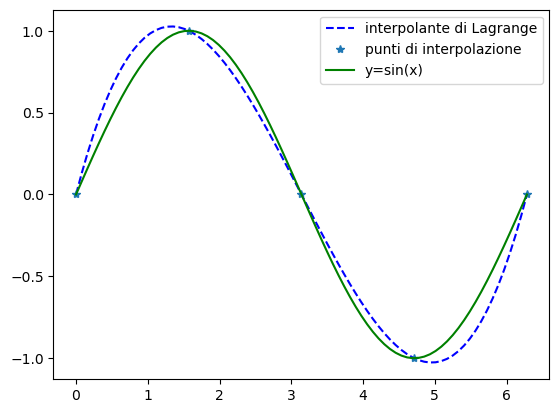

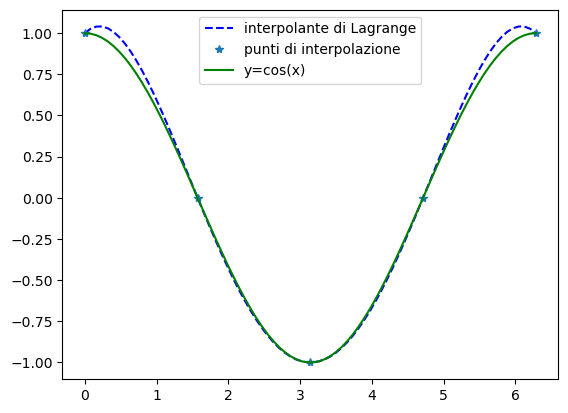

In [33]:
k = np.arange(0,5)
xk = k*(np.pi/2)
ys = [ math.sin(x) for x in xk ]
xx = np.linspace(xk[0], xk[len(xk)-1], 80)
y1 = interpL(xk,ys,xx)

plt.plot(xx,y1,'b--',xk,ys,'*',xx,np.sin(xx),'g-');
plt.legend(['interpolante di Lagrange','punti di interpolazione','y=sin(x)']);
plt.show()

yc = [ math.cos(x) for x in xk ]
y2 = interpL(xk,yc,xx)

plt.plot(xx,y2,'b--',xk,yc,'*',xx,np.cos(xx),'g-');
plt.legend(['interpolante di Lagrange','punti di interpolazione','y=cos(x)']);
plt.show()


## Esercizio 2
Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,\cdots,3$
dove $x_i,i=0,3$ sono punti equidistanti nell' intervallo [-1,1] e $y_i=f(x_i)$ dove $f(x)=3x^3+2x^2+2x-1$ 

[0 1 2 3 4]


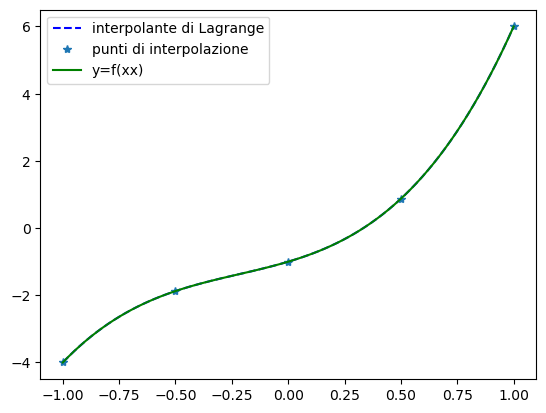

In [50]:
i = np.arange(0,5)
print(i)
xi = np.linspace(-1,1,len(i))
y = np.polyval([3, 2,  2, -1], xi)
xx = np.linspace(-1, 1, 80)
yf = interpL(xi, y, xx)

plt.plot(xx,yf,'b--',xi,y,'*',xx,np.polyval([3, 2,  2, -1], xx),'g-');
plt.legend(['interpolante di Lagrange','punti di interpolazione','y=f(xx)']);
plt.show()


## Esercizio 3

La temperatura $T$ in  prossimità  del suolo  subisce una variazione dipendente dalla latitudine $L$ nel seguente modo

L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])

T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])


 
- Si vuole costruire un modello che descriva la legge $T = T(L)$ anche per latitudini non misurate. A tal fine si scriva uno script che fornisca la variazione di temperatura alle latitudini $L = \pm 42$ utilizzando il polinomio interpolante. Visualizzare in un grafico i dati assegnati, il polinomio interpolante e le stime di $T$ ottenute per $L = \pm 42$.


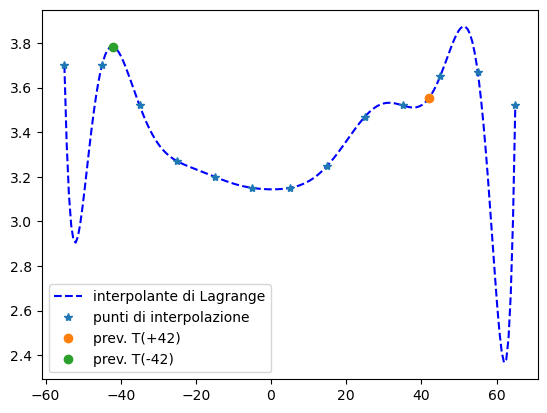

In [53]:
L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65]) # x
T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52]) # y
LL = np.linspace(-55,65,200) # valuto rispetto ad altri punti
Tf = interpL(L, T, LL)

# punti di previsione
L1 = np.array([42])
L1f = interpL(L,T,L1)

L2 = np.array([-42])
L2f = interpL(L,T,L2)

plt.plot(LL,Tf,'b--',L,T,'*',L1,L1f,'o',L2,L2f,'o');
plt.legend(['interpolante di Lagrange','punti di interpolazione','prev. T(+42)','prev. T(-42)']);
plt.show()


## Esercizio 4 

Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange con $x_i$ scelti dall'utente come:
    - punti equidistanti in un intervallo $[a, b]$,
    - punti definiti dai nodi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ di una funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. Testare lo script sulle funzioni
 
  - $f(x) = \sin(x)-2 \sin(2x)$,   $ \quad x \in [-\pi,\pi]$,
  -  $f(x) = \sinh(x)$, $ \quad  x \in [-2, 2]$,
  - $f(x) = |x|$,  $ \quad x \in [-1, 1]$,
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).

Calcolare l'errore di interpolazione $r(x) = f(x)-p(x)$,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$.
Visualizzare il grafico di $f(x)$ e $p(x)$, ed il grafico di
$|r(x)|$. Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$?
(Si costruisca una tabella che riporti i valori di $\|r(x)\|_{\infty}$ al variare di $n$).

## Esercizio 5

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue
scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con
i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.

## Esercizio 6

Si interpolino mediante il polinomio $p_{21}(x)$ i 22 punti $(x_i, y_i)$ con $x_i$ equispaziati in $[-1, 1]$ e $y_i = \sin(2 \pi x_i)$. Si considerino poi le ordinate $\tilde{y}_i = y_i + \varepsilon_i$, dove $\varepsilon_i$ denota l'$i$-esima componente del vettore $0.0002*np.random.random(22,)$, e si calcoli il corrispondente
polinomio interpolante $\tilde{p}_{21}(x)$. Si visualizzino e si commentino
i risultati ottenuti, calcolando anche l'errore relativo sul polinomio interpolante
e sui dati.
